In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform =  transforms.Compose(
    [transforms.ToTensor(), # transform img to pytorch tensors
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #Normalize avg -> 0, std_dvtn -> 0.5

trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Files already downloaded and verified


/home/aknova/anaconda3/envs/exp_ml/lib/python3.12/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


Files already downloaded and verified


horse  frog horse plane


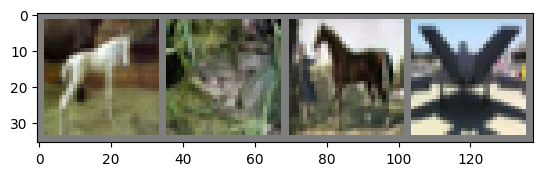

In [3]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

data_iter = iter(trainloader)
images, labels = next(data_iter)

imshow(torchvision.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

In [4]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5) # in_channel (3 => RGB, 1 => Monochrome), out_channel, kernel_size ()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5) #in_channel matches out_channel from previous layer (excluding pooling, normalization etc. layers)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 5*5 image dimenesion, 16 is out_channel from previous layer
        self.fc2 = nn.Linear(120, 84) #in_feature matches out_feature of previous layer
        self.fc3 = nn.Linear(84, 10) # final layer out_feature : 10 => number of classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
num_epochs = 2
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
        if i % 2000 == 1999:
            print("[%d, %5d] loss: %.3f" % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

print("Finishing Training")

[1,  2000] loss: 2.254
[1,  4000] loss: 1.934
[1,  6000] loss: 1.714
[1,  8000] loss: 1.602
[1, 10000] loss: 1.553
[1, 12000] loss: 1.488
[2,  2000] loss: 1.395
[2,  4000] loss: 1.350
[2,  6000] loss: 1.328
[2,  8000] loss: 1.328
[2, 10000] loss: 1.298
[2, 12000] loss: 1.291
Finishing Training


In [7]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Accuracy of the network on the 10000 test images: %d %%" % (100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %
